# Evaluating Aircraft Safety: 
# A Risk Assessment Blueprint for Business Expansion in the Aviation Industry

<img src="image.jpg" alt="Aircraft Image" style="width: 92%;"/>


## Business Understanding

### 1.0 Business problem
This project involves data cleaning, imputation, analysis, and visualization to generate insights for decision-making in purchasing and operating airplanes for commercial and private enterprises. The dataset was provided by the United States National Transportation Safety Board. This aviation accident data is from 1962 to 2023 and it is about civil aviation accidents and selected incidents in the United States and international waters.

### 2.0 Objectives

* To develop a Jupyter notebook
* To create a Github Repository
* To develop an Interactive Dashboard with Tableau
* To understand the companies owning the largest aviation market share 
* To make recommendations to move forward with the new aviation opportunity
* To develop a brief non-technical presentation for the stakeholders

### 3.0 Brief Conclusion 
The evaluation will provide business intelligence by recommending how the business should move forward with the new aviation opportunity...


## Data Understanding
In this section, we import respective libraries for reading the data, cleaning, analyzing and visualizing the data.

### 2.1 Importing the libraries

In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

### 2.2 Reading the Dataset
The dataset used in this evaluation was sourced from The US National Transportation Safety Board. 

The 'AviationData.csv' dataset is about civil aviation accidents and selected incidents in the United States and international waters from 1962 to 2023. 

The dataset had over 88,000 rows and 31 columns.

### 2.3 Loading the Data

In [2]:
aviation_data_df = pd.read_csv('AviationData.csv', encoding='latin1', low_memory=False)

In [3]:
# Show the first 5 rows of the DataFrame
aviation_data_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
# Shape
aviation_data_df.shape

(88889, 31)

##### Comment
> This confirms there are 88K rows and 31 columns

In [5]:
# Show a summary of the DataFrame
aviation_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [6]:
# Show statistical summary of the dataset
aviation_data_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [7]:
# Show the column names of the DataFrame
aviation_data_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [8]:
# Check for number of null items
aviation_data_df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [9]:
aviation_data_df.isnull().sum()/aviation_data_df.shape[0] * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.601570
Airport.Name              40.708074
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.554748
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.982990
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

##### Observation/ Comment
> A lot of the columns like Latitude, Longitude, Aircraft Category, FAR Description, Air Carrier, and Schedule had missing values near 60%. Therefore, I dropped these from my data analysis.

In [10]:
# Check for duplicates
aviation_data_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
88884    False
88885    False
88886    False
88887    False
88888    False
Length: 88889, dtype: bool

In [11]:
# Number of unique values
for col in aviation_data_df.columns:
    print(f"{col.upper()}")
    print("-"*len(col))
    print(f"Number of unique values: {aviation_data_df[col].nunique()}")
    print("")

EVENT.ID
--------
Number of unique values: 87951

INVESTIGATION.TYPE
------------------
Number of unique values: 2

ACCIDENT.NUMBER
---------------
Number of unique values: 88863

EVENT.DATE
----------
Number of unique values: 14782

LOCATION
--------
Number of unique values: 27758

COUNTRY
-------
Number of unique values: 219

LATITUDE
--------
Number of unique values: 25589

LONGITUDE
---------
Number of unique values: 27154

AIRPORT.CODE
------------
Number of unique values: 10374

AIRPORT.NAME
------------
Number of unique values: 24870

INJURY.SEVERITY
---------------
Number of unique values: 109

AIRCRAFT.DAMAGE
---------------
Number of unique values: 4

AIRCRAFT.CATEGORY
-----------------
Number of unique values: 15

REGISTRATION.NUMBER
-------------------
Number of unique values: 79104

MAKE
----
Number of unique values: 8237

MODEL
-----
Number of unique values: 12318

AMATEUR.BUILT
-------------
Number of unique values: 2

NUMBER.OF.ENGINES
-----------------
Number of unique

In [12]:
# Value Counts
for col in aviation_data_df.columns:
    print(f"{col.upper()}")
    print("-"*len(col))
    if len(aviation_data_df[col].value_counts()) > 10:
        print(f"Top 5 values for the column: {col.upper()}")
        print(aviation_data_df[col].value_counts()[:5])
    else:
        print(aviation_data_df[col].value_counts())
    print("")

EVENT.ID
--------
Top 5 values for the column: EVENT.ID
Event.Id
20001214X45071    3
20001212X19172    3
20001214X45064    2
20001212X17570    2
20001214X37556    2
Name: count, dtype: int64

INVESTIGATION.TYPE
------------------
Investigation.Type
Accident    85015
Incident     3874
Name: count, dtype: int64

ACCIDENT.NUMBER
---------------
Top 5 values for the column: ACCIDENT.NUMBER
Accident.Number
ERA22LA103    2
DCA22WA089    2
DCA22WA167    2
ERA22LA119    2
CEN22LA149    2
Name: count, dtype: int64

EVENT.DATE
----------
Top 5 values for the column: EVENT.DATE
Event.Date
2000-07-08    25
1984-06-30    25
1982-05-16    25
1984-08-25    24
1986-05-17    24
Name: count, dtype: int64

LOCATION
--------
Top 5 values for the column: LOCATION
Location
ANCHORAGE, AK      434
MIAMI, FL          200
ALBUQUERQUE, NM    196
HOUSTON, TX        193
CHICAGO, IL        184
Name: count, dtype: int64

COUNTRY
-------
Top 5 values for the column: COUNTRY
Country
United States     82248
Brazil     

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20828\1948842115.py:7: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  print(aviation_data_df[col].value_counts()[:5])


In [13]:
# Unique values
aviation_data_df[aviation_data_df["Report.Status"] == "The pilot's failure to maintain directional control during the landing roll."]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
64098,20080326X00387,Accident,NYC08CA105,2008-02-19,"Atlanta, GA",United States,335232N,0084187W,PDK,Dekalb-Peachtree,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,NaN,The pilot's failure to maintain directional co...,25-09-2020
65178,20080908X01412,Accident,SEA08CA186,2008-08-16,"Lowman, ID",United States,044832N,1151852W,0U1,Warm Springs Creek Airport,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,The pilot's failure to maintain directional co...,25-09-2020
65758,20081223X70445,Accident,WPR09CA063,2008-12-21,"Great Falls, MT",United States,472857N,1112214W,GTF,Great Falls Int. Airport,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,The pilot's failure to maintain directional co...,25-09-2020
66074,20090316X63351,Accident,CEN09CA215,2009-03-16,"Springfield, IL",United States,395039N,0894041W,KSPI,Abraham Lincoln Capital Arpt.,...,Flight Test,NaN,0.0,1.0,0.0,0.0,VMC,NaN,The pilot's failure to maintain directional co...,25-09-2020
66098,20090325X92145,Accident,ERA09CA213,2009-03-20,"Merritt Island, FL",United States,282023N,0804111W,COI,Merritt Island Airport,...,Personal,"Servant Air Ministries, Inc",0.0,0.0,0.0,1.0,VMC,NaN,The pilot's failure to maintain directional co...,25-09-2020
66101,20090323X91126,Accident,WPR09CA162,2009-03-21,"Jackson, WY",United States,433626N,1104416W,JAC,Jackson Hole Airport,...,Personal,Derek J. Craighead,0.0,0.0,0.0,1.0,VMC,NaN,The pilot's failure to maintain directional co...,25-09-2020
66732,20090715X90043,Accident,WPR09CA346,2009-07-10,"Sulphur Creek, ID",United States,443223N,1152212W,ID74,Sulphur Creek Ranch,...,Personal,HELLER ROGER W,0.0,0.0,0.0,1.0,VMC,NaN,The pilot's failure to maintain directional co...,25-09-2020
66760,20090714X22723,Accident,CEN09CA436,2009-07-14,"Joplin, MO",United States,003796N,0942953W,LLN,Joplin Airport,...,Personal,Michael Warman,0.0,0.0,0.0,1.0,VMC,NaN,The pilot's failure to maintain directional co...,25-09-2020
66863,20090918X33042,Accident,WPR09LA457,2009-07-28,"Ely, NV",United States,391759N,1145031W,ELY,Ely Airport (Yelland Field),...,Personal,Bret Cox,0.0,0.0,0.0,2.0,VMC,NaN,The pilot's failure to maintain directional co...,25-09-2020
66956,20090812X54213,Accident,WPR09CA394,2009-08-09,"Sisters, OR",United States,441816N,1213221W,6K5,Sisters Eagle Air Airport,...,Personal,HAPHEY BRUCE F,0.0,1.0,0.0,0.0,VMC,NaN,The pilot's failure to maintain directional co...,25-09-2020


# Data Cleaning

In [14]:
# Make a copy of the dataframe
aviation_data_copy_df=aviation_data_df.copy(deep=True)

In [15]:
# Use the str.strip function on colunms to strip the leading and trailing spaces
for column in aviation_data_df.columns:
    if aviation_data_df[column].dtype == 'object':
        aviation_data_df[column] = aviation_data_df[column].str.strip()

In [16]:
aviation_data_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [17]:
aviation_data_df[aviation_data_df['Location'].isnull() == True]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
4239,20001214X42513,Accident,LAX83LAMS4,1983-03-29,NaN,United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,0.0,0.0,0.0,VMC,Unknown,Probable Cause,NaN
5726,20001214X44103,Accident,DCA83RA001,1983-08-04,NaN,Pakistan,NaN,NaN,NaN,NaN,...,Unknown,NaN,0.0,0.0,0.0,245.0,UNK,NaN,Foreign,06-02-1995
7948,20001214X39337,Incident,MIA84IA140,1984-04-14,NaN,Martinique,NaN,NaN,NaN,NaN,...,Unknown,Pan American (paaa),0.0,0.0,0.0,263.0,VMC,Climb,Probable Cause,NaN
10546,20001214X41859,Accident,MIA85LAMS1,1984-12-23,NaN,United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,NaN
12527,20001214X37399,Accident,CHI85FAMS3,1985-08-03,NaN,United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,NaN
22058,20001213X27404,Accident,DCA89WA019,1988-12-16,NaN,Hong Kong,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,15.0,UNK,NaN,Foreign,06-02-1995
24214,20001213X29712,Accident,SEA90FAMS1,1989-10-06,NaN,United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,0.0,0.0,0.0,VMC,Unknown,Probable Cause,26-06-1992
26295,20001212X24088,Accident,MIA90WA175,1990-08-07,NaN,Anguilla,NaN,NaN,NaN,NaN,...,Unknown,NaN,0.0,0.0,0.0,1.0,VMC,NaN,Foreign,06-02-1995
26881,20001212X24491,Accident,LAX91LA013,1990-10-22,NaN,American Samoa,NaN,NaN,NaN,NaN,...,Aerial Observation,NaN,2.0,0.0,0.0,0.0,VMC,Maneuvering,Probable Cause,30-12-1992
27261,20001212X16361,Accident,MIA91WA066,1991-01-14,NaN,Montserrat,NaN,NaN,NaN,NaN,...,Business,NaN,1.0,0.0,0.0,0.0,VMC,NaN,Foreign,05-08-1996


In [18]:
# Use the str.capitalize function on colunms to change str values to the same case
cols_to_change = ["Country"]
for column in cols_to_change:
    if aviation_data_df[column].dtype == 'object':
        aviation_data_df[column] = aviation_data_df[column].str.title()

In [19]:
aviation_data_df[["Location", "Country"]]

,Location,Country
0,"MOOSE CREEK, ID",United States
1,"BRIDGEPORT, CA",United States
2,"Saltville, VA",United States
3,"EUREKA, CA",United States
4,"Canton, OH",United States
...,...,...
88884,"Annapolis, MD",United States
88885,"Hampton, NH",United States
88886,"Payson, AZ",United States
88887,"Morgan, UT",United States


#### Drop Columns with more than 60% missing values

In [20]:
# Drop the columns that have a high number of missing values(more than 30,000)
aviation_data_df.drop(['Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Aircraft.Category', 'FAR.Description', 'Schedule', 'Air.carrier', 'Publication.Date'], axis=1, inplace=True)

#### Convert date types and drop duplicated rows

In [21]:
# Convert Event.Date to datetime
aviation_data_df['Event.Date']= pd.to_datetime(aviation_data_df['Event.Date'])
print(aviation_data_df.dtypes)

Event.Id                          object
Investigation.Type                object
Accident.Number                   object
Event.Date                datetime64[ns]
Location                          object
Country                           object
Injury.Severity                   object
Aircraft.damage                   object
Registration.Number               object
Make                              object
Model                             object
Amateur.Built                     object
Number.of.Engines                float64
Engine.Type                       object
Purpose.of.flight                 object
Total.Fatal.Injuries             float64
Total.Serious.Injuries           float64
Total.Minor.Injuries             float64
Total.Uninjured                  float64
Weather.Condition                 object
Broad.phase.of.flight             object
Report.Status                     object
dtype: object


In [22]:
# Drop duplicated rows in 'Event.Id' column
aviation_data_df.drop_duplicates(subset=['Event.Id'], inplace=True)


In [23]:
# Drop duplicated rows in 'Registration.Number' column
aviation_data_df.drop_duplicates(subset=['Registration.Number'], inplace=True)

# Drop rows with missing values in 'Registration.Number' column
aviation_data_df.dropna(subset=['Registration.Number'], inplace=True)

In [24]:
# Drop rows with missing values that when filled with any statistical or string values might mess with the integrity of the dataset
aviation_data_df.dropna(subset=['Number.of.Engines'], inplace=True)
aviation_data_df.dropna(subset=['Engine.Type'], inplace=True)
aviation_data_df.dropna(subset=['Amateur.Built'], inplace=True)


In [25]:
# Find the values in the' Make' column corresponding to a value in the 'Model' column and fill in the missing values in 'Model'
make_to_model = aviation_data_df.dropna(subset=['Make', 'Model']).groupby('Make')['Model'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).to_dict()

# Fill missing values in 'Model'
aviation_data_df['Model'] = aviation_data_df.apply(lambda row: make_to_model.get(row['Make'], row['Model']) if pd.isna(row['Model']) else row['Model'], axis=1)

In [26]:
# Drop rows with missing values in the 'Model' column
aviation_data_df.dropna(subset=['Model'], inplace=True)

In [27]:
# Drop rows with missing values in the 'Make' column
aviation_data_df.dropna(subset=['Make'], inplace=True)

In [28]:
# Specify the numerical columns to fill NaNs
numerical_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

# Calculate the mean for each column
means = aviation_data_df[numerical_columns].mean()

# Fill NaN values with the respective column means
for column in numerical_columns:
    aviation_data_df[column] = aviation_data_df[column].fillna(means[column])

In [29]:
# Fill the 'Location' column missing values with 'Unavailable' 
aviation_data_df['Location'] = aviation_data_df['Location'].fillna('Unavailable')
                                                                             
# Fill the 'Country' column missing values with 'Unavailable' 
aviation_data_df['Country'] = aviation_data_df['Country'].fillna('Unavailable')

# Fill the 'Injury.Severity' column missing values with 'Unavailable' 
aviation_data_df['Injury.Severity'] = aviation_data_df['Injury.Severity'].fillna('Unavailable')

# Fill the 'Report.Status' column missing values with 'Report Missing' 
aviation_data_df['Report.Status'] = aviation_data_df['Report.Status'].fillna('Unavailable')

# Check unique values in the 'Broad.phase.of.flight column and determine value to fill missing values
aviation_data_df['Broad.phase.of.flight'].unique()
aviation_data_df['Broad.phase.of.flight'] = aviation_data_df['Broad.phase.of.flight'].fillna('Unknown')

# Fill the 'Purpose.of.flight' column missing values with 'Unknown' 
aviation_data_df['Purpose.of.flight'] = aviation_data_df['Purpose.of.flight'].fillna('Unknown')

# Fill the 'Aircraft.damage' column missing values with 'Uknowm'
aviation_data_df['Aircraft.damage'] = aviation_data_df['Aircraft.damage'].fillna('Unknown')
aviation_data_df

# Fill the 'Weather.Condition' column missing values with 'UKN'
aviation_data_df['Weather.Condition'] = aviation_data_df['Weather.Condition'].fillna('Unk')


In [30]:
aviation_data_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status'],
      dtype='object')

In [31]:
aviation_data_df.shape

(71189, 22)

In [32]:
aviation_data_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,1.0,Reciprocating,Personal,2.00000,0.000000,0.000000,0.000000,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,1.0,Reciprocating,Personal,4.00000,0.000000,0.000000,0.000000,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,1.0,Reciprocating,Personal,3.00000,0.253925,0.340981,4.227214,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,1.0,Reciprocating,Personal,2.00000,0.000000,0.000000,0.000000,IMC,Cruise,Probable Cause
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,CF-TLU,Mcdonnell Douglas,...,2.0,Turbo Fan,Unknown,0.46964,0.253925,1.000000,44.000000,VMC,Climb,Probable Cause


In [33]:
# Cleaning the Make Column
aviation_data_df['Make'] = aviation_data_df['Make'].apply(lambda x: x.title())

In [34]:
makes_to_change = ["Airbus", "Boeing", "Cessna", "Grumman", "Piper", "Bell", "Beech", "Mcdonnell", "Rockwell"]
for makes in makes_to_change:
    aviation_data_df['Make'] = aviation_data_df['Make'].apply(
        lambda word: makes if word.startswith(makes) else word)
    
for makes in makes_to_change:
    print(makes)
    print("-" * len(makes))
    print(aviation_data_df[aviation_data_df['Make'].str.startswith(makes) == True]['Make'].value_counts())

Airbus
------
Make
Airbus    228
Name: count, dtype: int64
Boeing
------
Make
Boeing    1358
Name: count, dtype: int64
Cessna
------
Make
Cessna    23208
Name: count, dtype: int64
Grumman
-------
Make
Grumman    1353
Name: count, dtype: int64
Piper
-----
Make
Piper    12819
Name: count, dtype: int64
Bell
----
Make
Bell    3059
Name: count, dtype: int64
Beech
-----
Make
Beech    4711
Name: count, dtype: int64
Mcdonnell
---------
Make
Mcdonnell    436
Name: count, dtype: int64
Rockwell
--------
Make
Rockwell    363
Name: count, dtype: int64


#### Feature Engineering 

-- Create a new feature based on the pre-existing columns in the dataset

In [35]:
# Create a new column 'Total.Passengers.Onboard'
# Define the columns of interest
aviation_data_df['Total.Passengers.Onboard'] = aviation_data_df[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 
                                                                 'Total.Minor.Injuries', 'Total.Uninjured']].sum(axis=1)

In [36]:
# Save the clean csv
aviation_data_df.to_csv("cleaned_df.csv", index=False)

# Exploratory Data Analysis

#### Helper Functions

In [37]:
def plot_barplot(data, title, xlabel, ylabel):
    sns.barplot(y=data[:10].index, 
             x=data[:10].values)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);

#### Total Passengers

In [38]:
# Statistical Overview of the column
aviation_data_df['Total.Passengers.Onboard'].describe()

count    71189.000000
mean         5.291761
std         23.119792
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        700.064546
Name: Total.Passengers.Onboard, dtype: float64

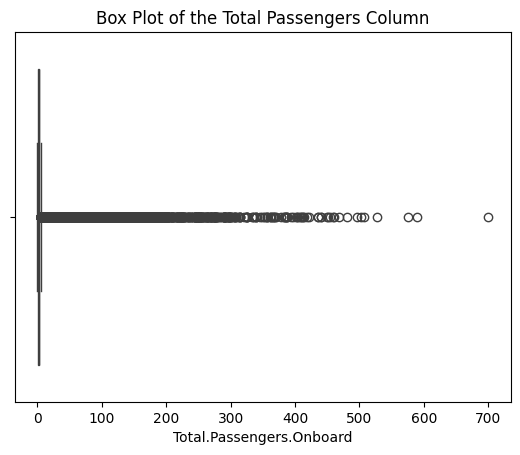

In [39]:
#plot the Total passengers
sns.boxplot(x=aviation_data_df['Total.Passengers.Onboard'])
plt.title("Box Plot of the Total Passengers Column") 
# Save the image;
plt.savefig('images/boxplottotalpassengers.png', bbox_inches='tight') 

#### Aircraft Make per Total Passengers

In [40]:
#identify the top 10 aircrafts with the highest passenger population
total_pop_aircraft = aviation_data_df.groupby("Make")['Total.Passengers.Onboard'].sum().sort_values(ascending=False)[:10]
total_pop_aircraft

Make
Boeing       121402.767822
Cessna        53282.925949
Mcdonnell     33340.782386
Piper         30878.482963
Airbus        25826.949618
Beech         14083.730656
Douglas        7645.328011
Bell           7443.358611
Lockheed       6601.831305
Embraer        4552.552744
Name: Total.Passengers.Onboard, dtype: float64

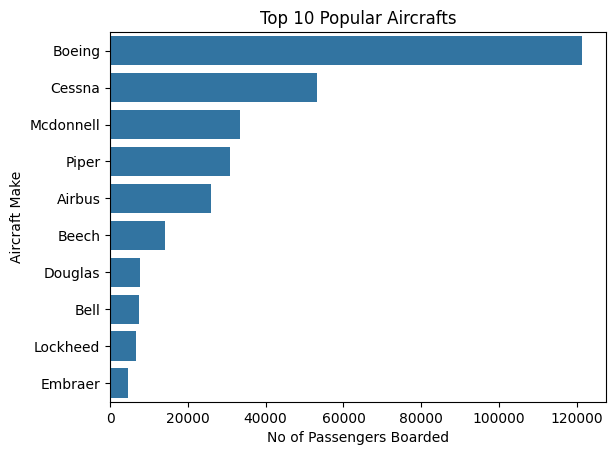

In [41]:
#plot Top 10 Popular Aircrafts
plot_barplot(data=total_pop_aircraft, 
            title="Top 10 Popular Aircrafts",
            xlabel="No of Passengers Boarded",
            ylabel="Aircraft Make"),

# Save the image;
plt.savefig('images/Top10PopularAircrafts.png', bbox_inches='tight')

#### Total number of accidents per Aircraft Make

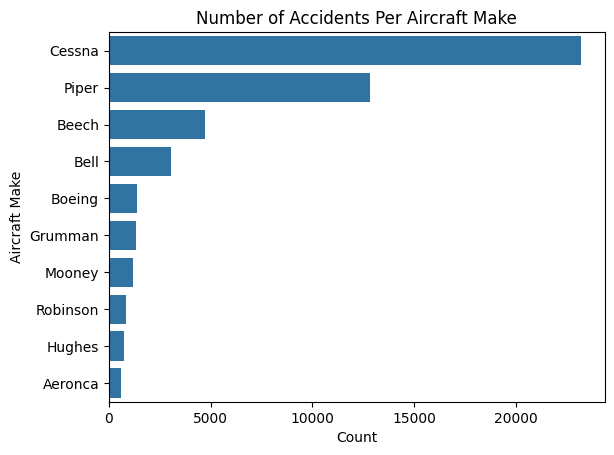

In [42]:
# plot number of accidents by aircraft make
plot_barplot(data=aviation_data_df['Make'].value_counts(), 
            title="Number of Accidents Per Aircraft Make",
            xlabel="Count",
            ylabel="Aircraft Make")
# Save the image;
plt.savefig('images/NumberofAccidentsPerAircraftMake.png', bbox_inches='tight')

##### Observation
> Cessna and Piper aircrafts have, unfortunately, been in the most accidents according to the dataset.

#### Aircraft's Purpose of Flight - Makes and Models

In [43]:
# Value counts of the Purpose of the Flights in the dataset
aviation_data_df['Purpose.of.flight'].value_counts()[:10]

Purpose.of.flight
Personal              41975
Instructional          8808
Unknown                7555
Aerial Application     3681
Business               3507
Positioning            1366
Other Work Use          945
Ferry                   707
Aerial Observation      608
Public Aircraft         608
Name: count, dtype: int64

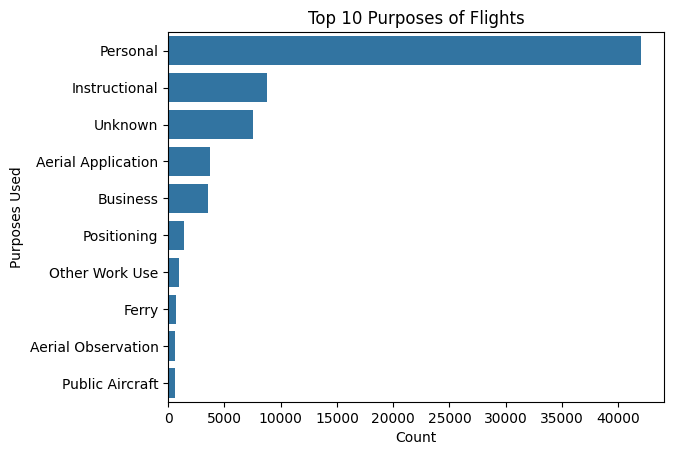

In [44]:
#Top 10 Purposes of flights plot
plot_barplot(data=aviation_data_df['Purpose.of.flight'].value_counts(), 
            title="Top 10 Purposes of Flights",
            xlabel="Count",
            ylabel="Purposes Used")

# Save the image;
plt.savefig('images/Top10PurposesofFlights.png', bbox_inches='tight')

In [45]:
# Business purpose of flight
aviation_data_df[aviation_data_df['Purpose.of.flight'] == "Business"]["Make"].value_counts()[:10]

Make
Cessna          1219
Piper            730
Beech            451
Bell             202
Mooney            95
Hughes            72
Robinson          51
De Havilland      32
Enstrom           26
Mitsubishi        26
Name: count, dtype: int64

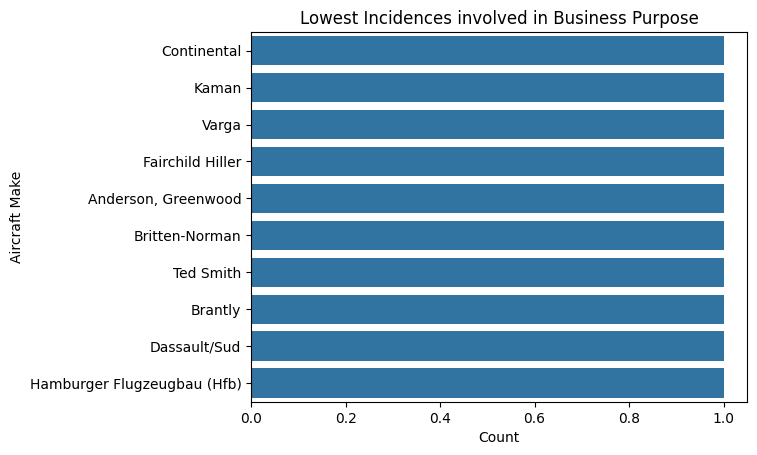

In [46]:
# Lowest incidences in Business purpose of flight
plot_barplot(data=aviation_data_df[aviation_data_df['Purpose.of.flight'] == "Business"]["Make"].value_counts(ascending=True), 
            title="Lowest Incidences involved in Business Purpose",
            xlabel="Count",
            ylabel="Aircraft Make")
# Save the image;
plt.savefig('images/LowestIncidencesinvolvedinBusinessPurpose.png', bbox_inches='tight')

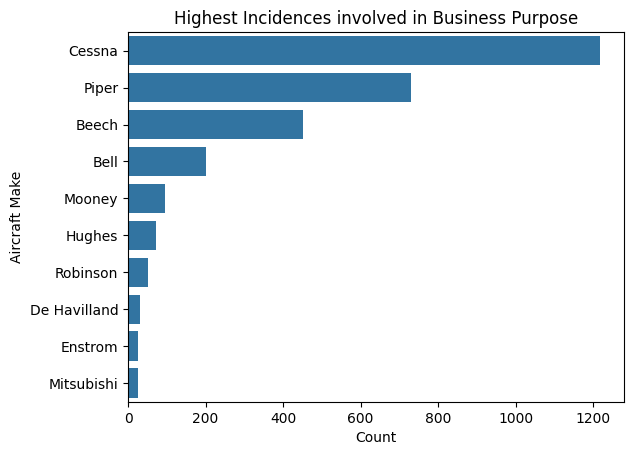

In [47]:
#Highest Incidences in BUisness purpose of flight
plot_barplot(data=aviation_data_df[aviation_data_df['Purpose.of.flight'] == "Business"]["Make"].value_counts(), 
            title="Highest Incidences involved in Business Purpose",
            xlabel="Count",
            ylabel="Aircraft Make")
# Save the image;
plt.savefig('images/HighestIncidencesinvolvedinBusinessPurpose.png', bbox_inches='tight')

In [48]:
#Count of purposes of flight grouped
aviation_data_df.groupby("Purpose.of.flight").count()["Make"]

Purpose.of.flight
ASHO                             2
Aerial Application            3681
Aerial Observation             608
Air Drop                         8
Air Race show                   53
Air Race/show                   38
Banner Tow                      70
Business                      3507
Executive/corporate            480
External Load                   75
Ferry                          707
Firefighting                    22
Flight Test                    315
Glider Tow                      29
Instructional                 8808
Other Work Use                 945
PUBS                             1
Personal                     41975
Positioning                   1366
Public Aircraft                608
Public Aircraft - Federal       75
Public Aircraft - Local         62
Public Aircraft - State         48
Skydiving                      151
Unknown                       7555
Name: Make, dtype: int64

In [49]:
# Identify the unique values of purpose of flight
aviation_data_df['Purpose.of.flight'].unique()

array(['Personal', 'Unknown', 'Business', 'Instructional', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO'], dtype=object)

### Aircraft Capacity by Total Passengers Onboard and Make


#### Large Aircrafts

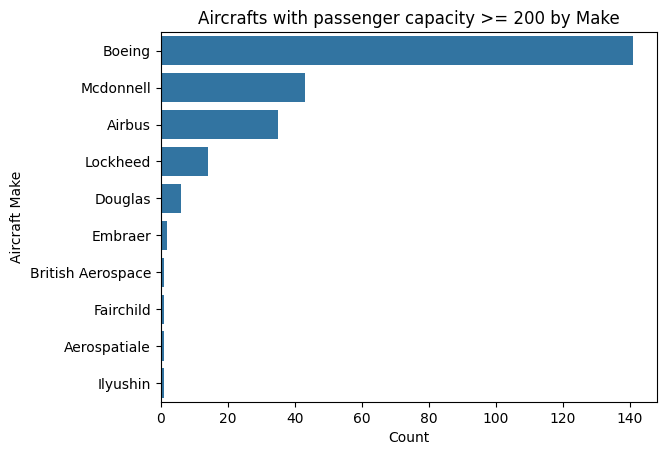

In [50]:
# Filter the DataFrame to include only planes with a capacity greater than 200
large_capacity_aircrafts_df = aviation_data_df[aviation_data_df['Total.Passengers.Onboard'] >= 200]
plot_barplot(data=large_capacity_aircrafts_df['Make'].value_counts(), 
            title="Aircrafts with passenger capacity >= 200 by Make",
            xlabel="Count",
            ylabel="Aircraft Make")

plt.savefig('images/large_capacity_aircrafts.png', bbox_inches='tight')

#### Medium capacity aircrafts

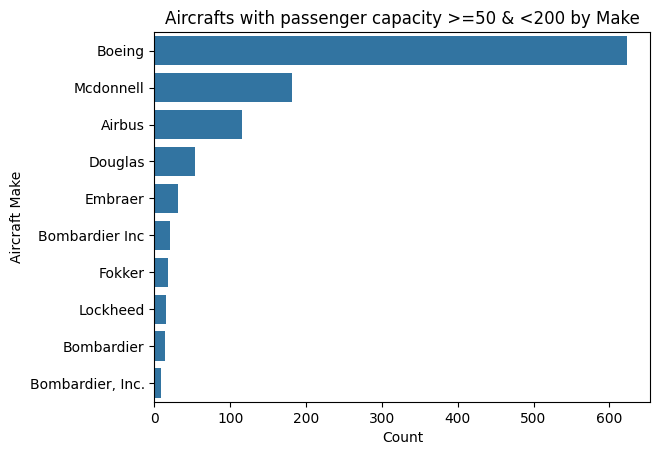

In [51]:
# Filter the DataFrame for medium capacity airplanes
medium_capacity_aircrafts_df = aviation_data_df[(aviation_data_df['Total.Passengers.Onboard'] >= 50) & 
                                                (aviation_data_df['Total.Passengers.Onboard'] < 200)]

plot_barplot(data=medium_capacity_aircrafts_df['Make'].value_counts(), 
             title="Aircrafts with passenger capacity >=50 & <200 by Make",
             xlabel="Count",
             ylabel="Aircraft Make")

plt.savefig('images/medium_capacity_aircrafts.png', bbox_inches='tight')


#### small aircrafts

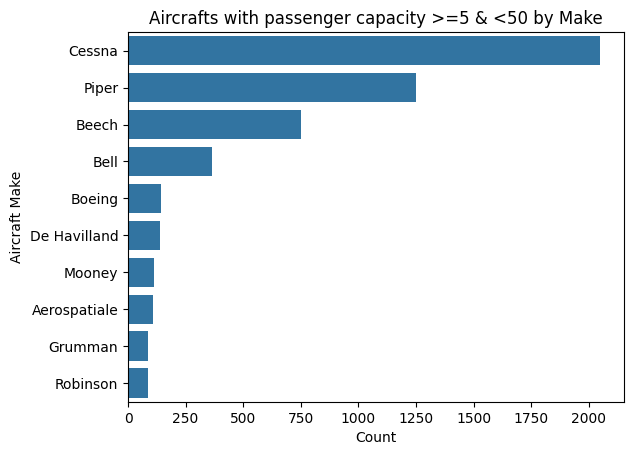

In [52]:
# Filter the DataFrame for small capacity airplanes
small_capacity_aircrafts_df = aviation_data_df[(aviation_data_df['Total.Passengers.Onboard'] >= 5) &          
                                                (aviation_data_df['Total.Passengers.Onboard'] < 50)]

plot_barplot(data=small_capacity_aircrafts_df['Make'].value_counts(), 
             title="Aircrafts with passenger capacity >=5 & <50 by Make",
             xlabel="Count",
             ylabel="Aircraft Make")

plt.savefig('images/small_capacity_aircrafts.png', bbox_inches='tight')

#### Extra small aircrafts

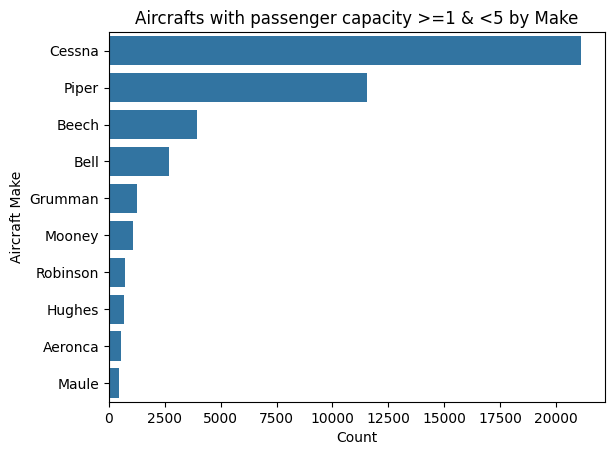

In [53]:
# Filter the DataFrame for small capacity airplanes
extra_small_capacity_aircrafts_df = aviation_data_df[(aviation_data_df['Total.Passengers.Onboard'] >= 1) &          
                                                (aviation_data_df['Total.Passengers.Onboard'] < 5)]

plot_barplot(data=extra_small_capacity_aircrafts_df['Make'].value_counts(), 
             title="Aircrafts with passenger capacity >=1 & <5 by Make",
             xlabel="Count",
             ylabel="Aircraft Make")

plt.savefig('images/extra_small_capacity_aircrafts.png', bbox_inches='tight')